## Population density graphs, London

On maps created using these boundaries the copyright must be stated. This is: "Contains National Statistics data © Crown copyright and database right [2015]" and "Contains Ordnance Survey data © Crown copyright and database right [2015]" -  Source: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london 

In [1]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

In [2]:
# Shapefiles
LondonBoroughs = gpd.read_file('London_Boroughs_shapefile/London_Borough_Excluding_MHW.shp')
LondonBoroughs = LondonBoroughs.to_crs({'init' :'epsg:3857'})#epsg:4326|epsg:3857
LondonWards = gpd.read_file('London_Wards_shapefile/London_Ward.shp')
LondonWards = LondonWards.to_crs({'init' :'epsg:3857'})#epsg:4326
# Population density
LB_popD = pd.read_csv('London_Boroughs_shapefile/London_Borough_pop_density.csv')
LW_popD = pd.read_csv('London_Wards_shapefile/London_ward_pop_density.csv')

In [3]:
# Size of the files, to compared with after the merge
print("Borough file: ", LondonBoroughs.shape)
print("Ward file: ", LondonWards.shape)

Borough file:  (33, 8)
Ward file:  (657, 7)


In [4]:
LondonBoroughs.loc[0:5]

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((-36811.0249027512 6679699.611714196,..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((-7126.811794464465 6677851.75973569,..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((1350.409897685223 6674461.41453996, ..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,POLYGON ((-27224.56122571158 6708199.030916286...
4,Ealing,E09000009,5554.428,0.000,F,None,None,POLYGON ((-45845.00531293114 6716316.318050784...
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((17665.60525387671 6712398.49749036, ..."


### What should we merge the Boroughs datasets on?

In [5]:
print("Merging on their names gives a similarity degree of %.2f" % \
      (sum([True for borough in np.array(LondonBoroughs["NAME"]) if \
      borough in np.array(LB_popD["Name"])])/LondonBoroughs.shape[0]))
print("Merging on their gss_code gives a similarity degree of %.2f" % \
      (sum([True for borough in np.array(LondonBoroughs["GSS_CODE"]) if \
      borough in np.array(LB_popD["GSS_CODE"])])/LondonBoroughs.shape[0]))

Merging on their names gives a similarity degree of 1.00
Merging on their gss_code gives a similarity degree of 1.00


### What should we merge the Wards datasets on?

In [6]:
print("Merging on their names gives a similarity degree of %.3f" % \
      (sum([True for ward in np.array(LondonWards["NAME"]) if \
      ward in np.array(LW_popD["NAME"])])/LondonWards.shape[0]))
print("Merging on their gss_code gives a similarity degree of %.2f" % \
      (sum([True for ward in np.array(LondonWards["GSS_CODE"]) if \
      ward in np.array(LW_popD["GSS_CODE"])])/LondonWards.shape[0]))

Merging on their names gives a similarity degree of 0.852
Merging on their gss_code gives a similarity degree of 0.71


In [7]:
name_comparison= [True if ward in np.array(LW_popD["NAME"]) else False for ward in np.array(LondonWards["NAME"])]
code_comparison= [True if ward in np.array(LW_popD["GSS_CODE"]) else False for ward in np.array(LondonWards["GSS_CODE"])]

In [8]:
diff = [True if name != code else False for name,code in zip(name_comparison,code_comparison)]

In [9]:
sum(diff)/LondonWards.shape[0]

0.1537290715372907

In [10]:
name_sf = np.array(LondonWards["NAME"])
code_sf = np.array(LondonWards["GSS_CODE"])
name_csv = np.array(LW_popD["NAME"])
code_csv = np.array(LW_popD["GSS_CODE"])

comeOn = []

for name,code in zip(name_sf,code_sf):
    if (name in name_csv) or (code in code_csv):
        comeOn.append(True)
    else:
        comeOn.append(False)

In [11]:
sum(comeOn)/LondonWards.shape[0]

0.8569254185692542

### The improvement is minimal, so we continue with the loss of around 15% of the wards

In [12]:
LB_popD.loc[0:5]

,GSS_CODE,population_density,Name
0,E09000001,0.002739,City of London
1,E09000002,0.005950,Barking and Dagenham
2,E09000003,0.004638,Barnet
3,E09000004,0.004174,Bexley
4,E09000005,0.007881,Brent
5,E09000006,0.002227,Bromley


In [13]:
LondonBoroughs = LondonBoroughs.merge(LB_popD, on="GSS_CODE")

In [14]:
LondonBoroughs.loc[0:5]

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,population_density,Name
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((-36811.0249027512 6679699.611714196,...",0.004847,Kingston upon Thames
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((-7126.811794464465 6677851.75973569,...",0.004584,Croydon
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((1350.409897685223 6674461.41453996, ...",0.002227,Bromley
3,Hounslow,E09000018,5658.541,60.755,F,None,None,POLYGON ((-27224.56122571158 6708199.030916286...,0.005026,Hounslow
4,Ealing,E09000009,5554.428,0.000,F,None,None,POLYGON ((-45845.00531293114 6716316.318050784...,0.006377,Ealing
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((17665.60525387671 6712398.49749036, ...",0.002302,Havering


In [15]:
# Size of the files, to compared with after the merge
print("Borough file: ", LondonBoroughs.shape)

Borough file:  (33, 10)


No handles with labels found to put in legend.


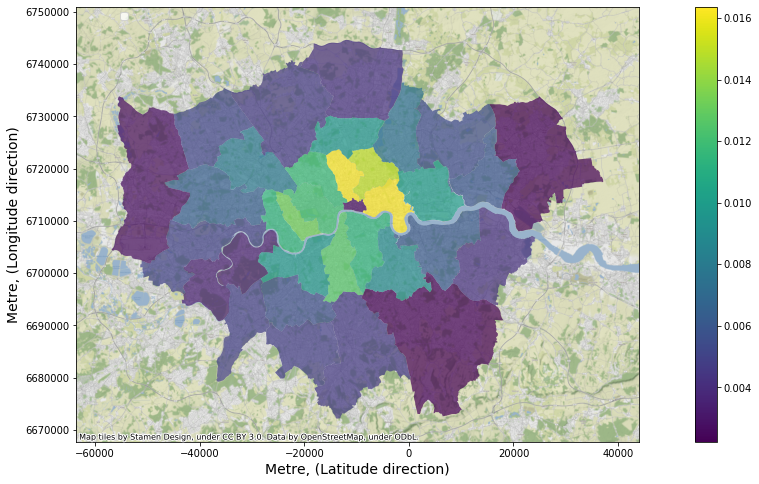

In [22]:
fig, ax = plt.subplots(1, 1,figsize=(20,8))
LondonBoroughs.plot(column="population_density",ax=ax,legend=True,alpha = 0.7)
ctx.add_basemap(ax,zoom=13)
plt.xlabel("Metre, (Latitude direction)",fontsize=14)
plt.ylabel("Metre, (Longitude direction)",fontsize=14)
# ax.legend(bbox_to_anchor=(0.1,1))
# plt.title("Population Density, London Borougs",fontsize=14)
# plt.legend(borderaxespad=0.1)
# plt.savefig("Graphs/pop_dens_london_borougs_A0_5.jpg",bbox_inches="tight")
plt.show()

In [18]:
LondonBoroughs[["NAME","population_density"]].sort_values("population_density",ascending=False)\
            .reset_index().drop("index",axis=1).loc[0:10]

,NAME,population_density
0,Tower Hamlets,0.016364
1,Islington,0.016261
2,Hackney,0.015036
3,Kensington and Chelsea,0.013241
4,Lambeth,0.012608
5,Westminster,0.012031
6,Camden,0.011727
7,Hammersmith and Fulham,0.011348
8,Southwark,0.011339
9,Newham,0.009931


In [19]:
LondonWards.loc[0:5]

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,POLYGON ((-36811.03121524076 6679699.615251794...
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,POLYGON ((-31625.29999937425 6686140.771439916...
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,POLYGON ((-33824.39323773101 6691015.990093677...
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((-30342.2618867428 6687409.205809769,..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,POLYGON ((-28802.04879612846 6694062.321216852...
5,Coombe Hill,E05000406,Kingston upon Thames,E09000021,442.170,0.0,POLYGON ((-28536.05119578191 6698844.404346891...


In [20]:
LondonWards = LondonWards.merge(LW_popD, on="NAME")

In [21]:
LondonWards.loc[0:5]

,NAME,GSS_CODE_x,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,GSS_CODE_y,population_density
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,POLYGON ((-36811.03121524076 6679699.615251794...,E05000405,0.001474
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,POLYGON ((-31625.29999937425 6686140.771439916...,E05000414,0.004243
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,POLYGON ((-33824.39323773101 6691015.990093677...,E05000401,0.007413
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((-30342.2618867428 6687409.205809769,...",E05000266,0.004920
4,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((-30342.2618867428 6687409.205809769,...",E05000266,0.003815
5,Alexandra,E05000266,Haringey,E09000014,261.385,0.0,POLYGON ((-12953.94217198777 6726884.585205371...,E05000266,0.004920


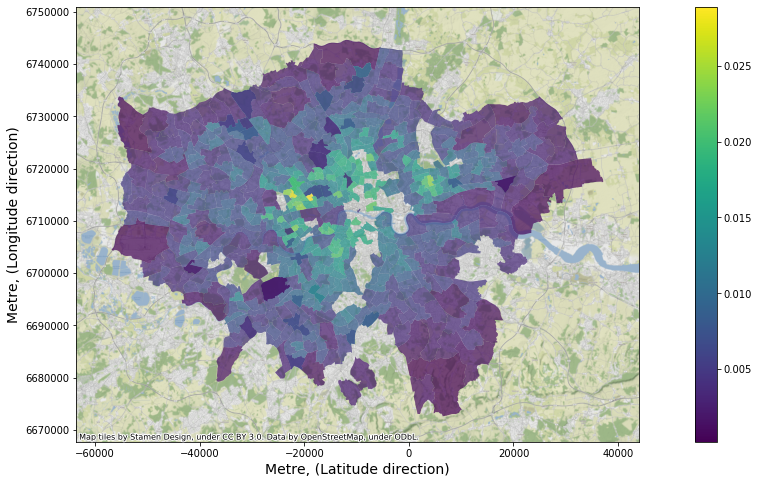

In [23]:
fig, ax = plt.subplots(1, 1,figsize=(20,8))
LondonWards.plot(column="population_density",ax=ax,legend=True,alpha = 0.7)
ctx.add_basemap(ax,zoom=13)#,url=ctx.sources.ST_TONER_LITE
plt.xlabel("Metre, (Latitude direction)",fontsize=14)
plt.ylabel("Metre, (Longitude direction)",fontsize=14)
# plt.title("Population Density, London Wards",fontsize=14)
plt.savefig("Graphs/pop_dens_london_wards.jpg",bbox_inches="tight")
# plt.show()

In [47]:
LondonWards[["NAME","population_density"]].sort_values("population_density",ascending=False)\
            .reset_index().drop("index",axis=1).loc[0:10]

,NAME,population_density
0,Church Street,0.028901
1,Harrow Road,0.027723
2,Lancaster Gate,0.024002
3,Queen's Park,0.023911
4,Green Street East,0.023828
5,Earl's Court,0.022839
6,Bayswater,0.022486
7,Whitechapel,0.021797
8,King's Cross,0.021723
9,Cazenove,0.021632
